In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from glob import glob
from tqdm import tqdm

### Exercise 1

In [4]:
%config Completer.use_jedi = False

In [5]:
def show_stars(rows=5):
    for i in range(1, rows+1):
        print('*'*i)

In [7]:
show_stars(7)

*
**
***
****
*****
******
*******


### Exercise 2

In [15]:
def wining_rate(num_plays=10000):
    win = 0 
    for i in range(num_plays):   # Play 1000 rounds
      position = 0
      for j in range(100):    # 1 lần chơi, được tung xúc sắc 100 lần.
        xucsac = np.random.randint(1, 7)
        if xucsac in [1,2]:
          position -= 1
          if position <0:
            position = 0
        elif xucsac in [3, 4, 5]:
          position +=1
        elif xucsac == 6:
          bonus = np.random.randint(1,7)
          position = position + bonus
      if position >= 60:
        win = win +1
    return win / num_plays

In [16]:
wining_rate()

0.8373

In [32]:
# Simulation/ End-game.
def wining_rate(num_plays=10000):
    win = 0 
    for i in range(num_plays):   # Play 1000 rounds
      position = 0
      for j in range(100):    # 1 lần chơi, được tung xúc sắc 100 lần.  100, có cả đi lên và đi xuống. while
        xucsac = np.random.randint(1, 7)
        if xucsac in [1,2]:
          position -= 1
          if position <0:
            position = 0
        elif xucsac in [3, 4, 5]:
          position +=1
        else:
          bonus = np.random.randint(1,7)
          position = position + bonus
       
        if np.random.uniform(size=1)[0]<= 0.001:
            position = 0
        
      if position >= 60:
        win = win +1
    return win / num_plays

In [33]:
wining_rate()

0.7757

In [17]:
# Simulation/ End-game.
def wining_rate(num_plays=10000):
    win = 0 
    for i in tqdm(range(num_plays)):   # Play 1000 rounds
      position, up_times = 0, 0
    
      while up_times <= 100:
        xucsac = np.random.randint(1, 7)
        if xucsac in [1,2]:
          position = max(position - 1, 0)
        elif xucsac in [3, 4, 5]:
          position +=1
          up_times += 1
        else:
          bonus = np.random.randint(1,7)
          position = position + bonus
          up_times += 1
       
        if np.random.uniform(size=1)[0]<= 0.001:
            position = 0
        
      if position >= 60:
        win = win +1
    return win / num_plays

In [18]:
wining_rate()

100%|██████████| 10000/10000 [00:14<00:00, 691.26it/s]


0.92

- for: biết trước số lần lặp
- while: khi không biết trước số lần lặp.

### Exercise 3

In [3]:
paths = sorted(glob('./Names/*.txt'))

li = []
for path in paths:
    df = pd.read_csv(path, header=None, names=['name', 'gender', 'occurrence'])
    df['year'] = int(path[-8:-4])
    li.append(df)
    
df = pd.concat(li, ignore_index=True)

In [38]:
df.head()

,name,gender,occurrence,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


**Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)**

In [42]:
total_births = df.groupby(['year', 'gender']).sum().unstack('gender')
total_births

occurrence         
gender          F        M
year                      
1880        90994   110490
1881        91953   100743
1882       107847   113686
1883       112319   104625
1884       129019   114442
...           ...      ...
2014      1782350  1916564
2015      1780453  1911537
2016      1766212  1891585
2017      1719138  1842837
2018      1686961  1800392

[139 rows x 2 columns]

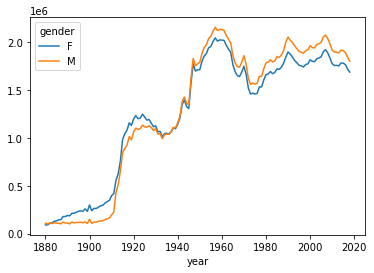

In [44]:
df.pivot_table(index='year', columns='gender', values='occurrence', aggfunc='sum').plot();

**Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính**

In [45]:
df.head(2)

,name,gender,occurrence,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880


In [54]:
top_1000 = df.groupby(['year', 'gender']).apply(lambda x : x[['name', 'occurrence']].nlargest(1000, 'occurrence', keep='all')).droplevel(2)
top_1000

name  occurrence
year gender                       
1880 F            Mary        7065
     F            Anna        2604
     F            Emma        2003
     F       Elizabeth        1939
     F          Minnie        1746
...                ...         ...
2018 M          Korbyn         207
     M         Randall         207
     M          Benton         206
     M         Coleman         206
     M          Markus         206

[281378 rows x 2 columns]

**Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn**

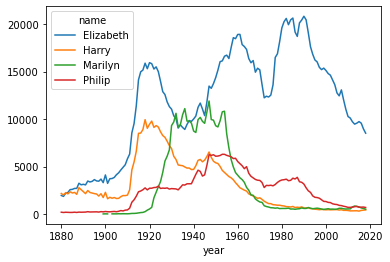

In [70]:
names = ['Philip', 'Harry', 'Elizabeth', 'Marilyn']
df.query("name in @names").groupby(['year', 'name']).occurrence.sum().reset_index().\
pivot(index='year', columns='name', values='occurrence').plot();

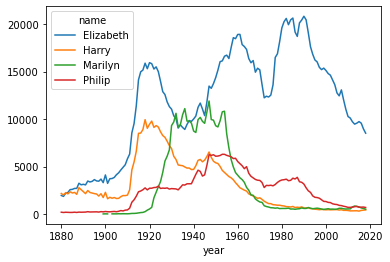

In [65]:
names = ['Philip', 'Harry', 'Elizabeth', 'Marilyn']
df.query("name in @names").groupby(['year', 'name']).occurrence.sum().unstack('name').plot();

**Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính**

**(thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)**

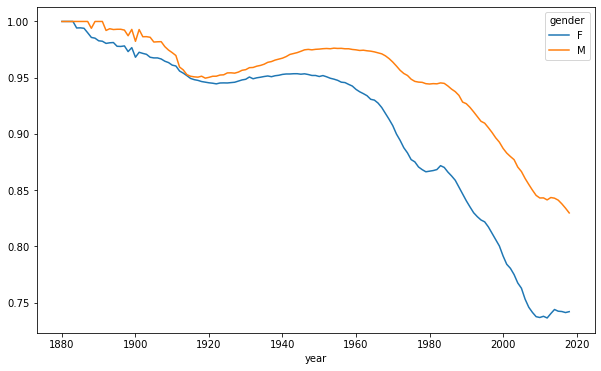

In [76]:
(top_1000.groupby(['year', 'gender']).occurrence.sum() / df.groupby(['year', 'gender']).\
     occurrence.sum()).unstack('gender').plot(figsize=(10, 6));

**Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018**

In [77]:
df_letter = df.query("year in [1900, 1960, 2018]")
df_letter['first_letter'] = df_letter.name.apply(lambda x : x[0])
df_letter.head(2)

/opt/anaconda3/envs/nmtruong/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,gender,occurrence,year,first_letter
52265,Mary,F,16706,1900,M
52266,Helen,F,6343,1900,H


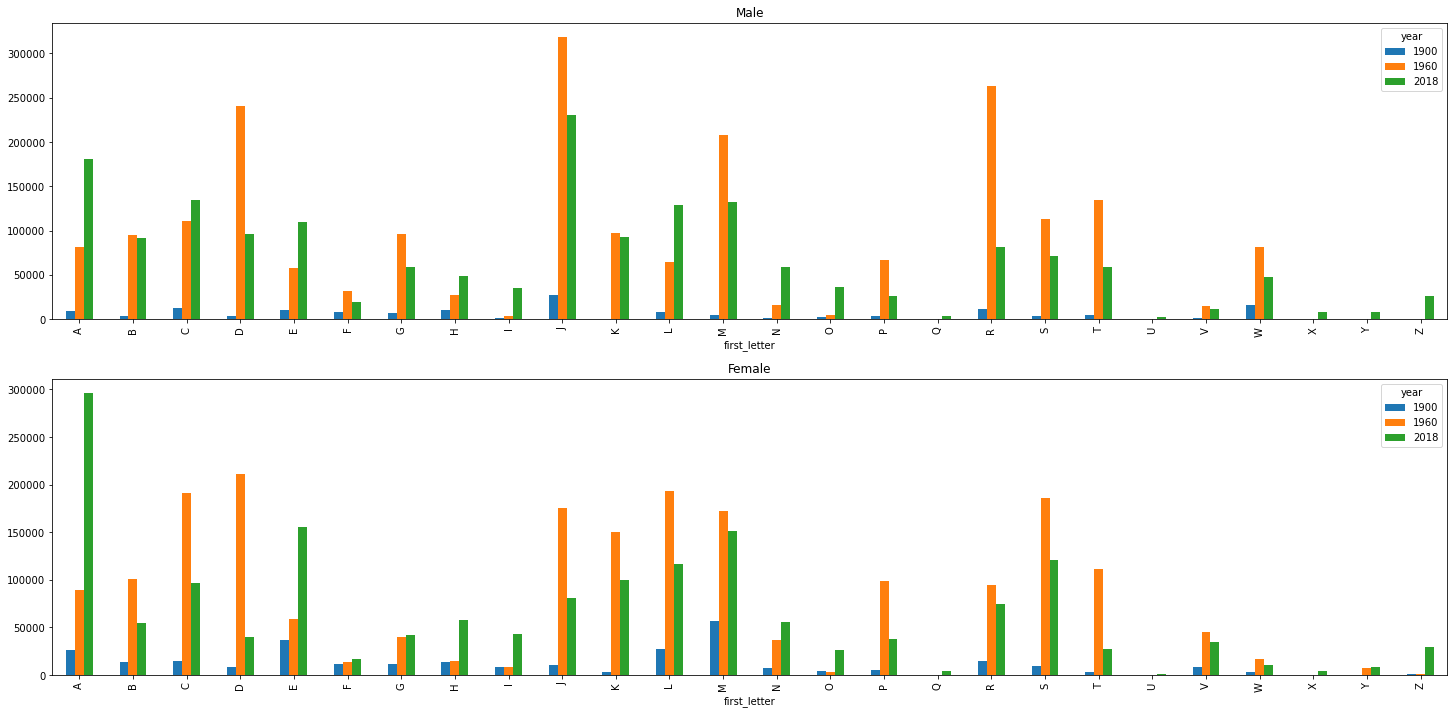

In [85]:
_, ax = plt.subplots(2, 1, figsize=(25, 12))

df_letter.query("gender == 'M'").groupby(['year', 'first_letter']).occurrence.sum().unstack('year').plot(kind='bar', ax=ax[0], title='Male')
df_letter.query("gender == 'F'").groupby(['year', 'first_letter']).occurrence.sum().unstack('year').plot(kind='bar', ax=ax[1], title='Female');

**Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl...” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.**

In [8]:
male_df = df.query("gender == 'M'")
female_df = df.query("gender == 'F'")

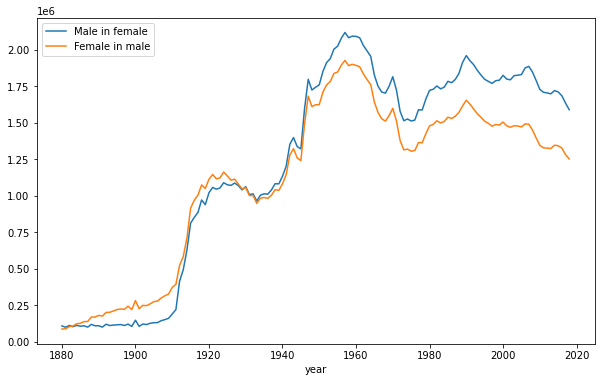

In [11]:
ax = male_df.query("name in @female_df.name").groupby('year').occurrence.sum().plot(label='Male in female', figsize=(10, 6))
female_df.query("name in @male_df.name").groupby('year').occurrence.sum().plot(label='Female in male', ax=ax)
plt.legend(loc='upper left');